In [2]:
import gymnasium as gym
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

/home/jainam/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [11]:
class Agent():
    def __init__(self,render=0,q=[]):

        desc = [
                    'SFFF',
                    'FFHF',
                    'FFFF',
                    'HFFG'
                ]
        if(render==0):
            self.env = gym.make("FrozenLake-v1", desc=desc, map_name="4x4", is_slippery=False)
        else:
            self.env = gym.make("FrozenLake-v1", desc=desc, map_name="4x4", is_slippery=False, render_mode="human")
        self.env.reset()
        self.num_states=self.env.observation_space.n
        self.num_actions=self.env.action_space.n
        if(len(q)==0):
            self.action_value=np.random.normal(size=(self.num_states, self.num_actions), loc=0.5, scale=0.001)
        else:
            self.action_value=q
        # self.num_occur=np.zeros((self.num_states,self.num_actions))
        self.num_episodes=10000
        self.num_steps=50
        self.alpha=0.1
        self.gamma=0.9
        self.reward_array=[]
        # self.epsilon=0.1

    def episode_iter(self,i):
        s=0
        curr_state=self.env.reset()[0]
        state_action_reward_array=[]
        cum_reward=0
        while(True):
            s+=1
            action=self.epsilon_greedy(curr_state)
            # self.num_occur[curr_state, action]+=1
            observation, reward, terminated, truncated, _=self.env.step(action)
            state_action_reward_array.append([curr_state, action, reward])
            curr_state=observation
            print(f'Car is in state {observation} at the {s} step of the {i} episode')
            cum_reward+=reward
            if(terminated or truncated):
                if terminated:  
                   print(f'Episode {i} completed !')
                self.reward_array.append(cum_reward)
                return state_action_reward_array

            
    def epsilon_greedy(self,state):
        epsilon=0.05
        action_greedy=np.argmax(self.action_value[state])
        action_array=np.arange(self.num_actions)
        action_array=np.insert(action_array,0,action_greedy)
        prob_array=np.ones(self.num_actions)*epsilon/self.num_actions
        prob_array=np.insert(prob_array,0,1-epsilon)
        print(action_array)
        action_actual=np.random.choice(a=action_array, p=prob_array)
        return action_actual
    
    def MonteCarlo(self):
        for i in range(self.num_episodes):

            reward_array=self.episode_iter(i)
            n=len(reward_array)
            Gt=np.zeros(n)
            Gt[n-1]=reward_array[n-1][2]
            for i in range(n-2,-1,-1):
                Gt[i]=reward_array[i][2]+self.gamma*Gt[i+1]

            for i,(state,action,_) in enumerate(reward_array):
                self.action_value[state,action]+=self.alpha*(Gt[i]-self.action_value[state,action])

    def TD0(self):
        for ne in range(self.num_episodes):
            curr_state=self.env.reset()[0]
            cum_reward=0
            action=self.epsilon_greedy(curr_state)
            for ns in range(self.num_steps):
                observation, reward, terminated, truncated, _=self.env.step(action)
                next_action=self.epsilon_greedy(observation)
                self.action_value[curr_state,action]+=self.alpha*(reward+self.gamma*self.action_value[observation,next_action]-self.action_value[curr_state,action])
                curr_state=observation
                action=next_action
                cum_reward+=reward
                print(f'Car is in state {observation} at step {ns} of episode {ne}')
                if terminated or truncated: 
                    self.reward_array.append(cum_reward)
                    break
            
    def generate_value_heatmap(self):
        sns.heatmap(self.action_value, annot=True, cmap='viridis')

    def graph_plotter(self):
        time=np.arange(len(self.reward_array))
        plt.scatter(time,self.reward_array)
        plt.show()
        
            





[3 0 1 2 3]
[3 0 1 2 3]
Car is in state 0 at step 0 of episode 0
[0 0 1 2 3]
Car is in state 0 at step 1 of episode 0
[0 0 1 2 3]
Car is in state 0 at step 2 of episode 0
[2 0 1 2 3]
Car is in state 0 at step 3 of episode 0
[2 0 1 2 3]
Car is in state 1 at step 4 of episode 0
[0 0 1 2 3]
Car is in state 2 at step 5 of episode 0
[1 0 1 2 3]
Car is in state 1 at step 6 of episode 0
[2 0 1 2 3]
Car is in state 5 at step 7 of episode 0
[0 0 1 2 3]
Car is in state 1 at step 8 of episode 0
[1 0 1 2 3]
Car is in state 0 at step 9 of episode 0
[1 0 1 2 3]
Car is in state 4 at step 10 of episode 0
[1 0 1 2 3]
Car is in state 8 at step 11 of episode 0
[0 0 1 2 3]
Car is in state 12 at step 12 of episode 0
[2 0 1 2 3]
[3 0 1 2 3]
Car is in state 1 at step 0 of episode 1
[3 0 1 2 3]
Car is in state 1 at step 1 of episode 1
[2 0 1 2 3]
Car is in state 1 at step 2 of episode 1
[2 0 1 2 3]
Car is in state 2 at step 3 of episode 1
[0 0 1 2 3]
Car is in state 3 at step 4 of episode 1
[3 0 1 2 3]
Car is

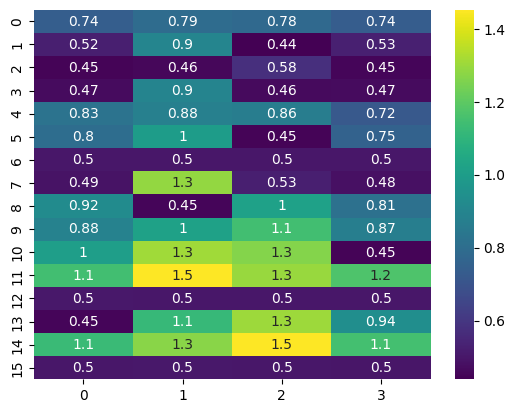

In [14]:
agent1=Agent(render=0)
agent1.TD0()
agent1.env.close()
agent1.generate_value_heatmap()
plt.show()
# agent2=Agent(render=1, q=agent1.action_value)
# agent2.MonteCarlo()


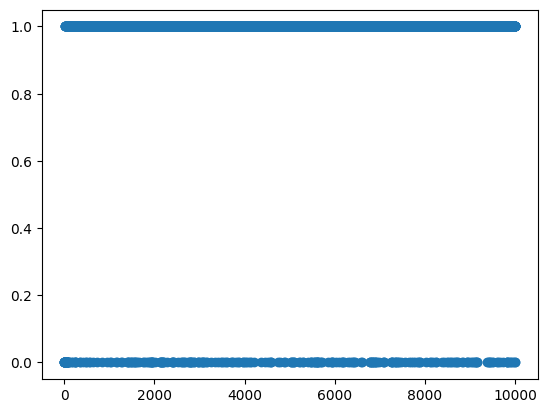

In [16]:
agent1.graph_plotter()

In [ ]:
agent2=Agent(render=1, q=agent1.action_value)
agent2.episode_iter(1)

[2 0 1 2 3]
Car is in state 1 at the 1 step of the 1 episode
[2 0 1 2 3]
Car is in state 5 at the 2 step of the 1 episode
[1 0 1 2 3]
Car is in state 6 at the 3 step of the 1 episode
Episode 1 completed !


[[0, 1, 0.0], [1, 2, 0.0], [5, 1, 0.0]]